# Project Assignment 2
Selina Narain
April 8, 2023
DTSC 620
Professor Kiran Balagani


In [82]:
import pandas as pd
import numpy as np
import graphviz
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, RocCurveDisplay
warnings.filterwarnings('ignore')


In [83]:
#Loading a dataset into a dataframe
spam_dataset_dataframe = pd.read_csv("/Users/selinanarain/Desktop/DTSC 620/ProjectAssignment2/spam.csv")
print('Dataset Loaded...')

Dataset Loaded...


In [84]:
#Check for missing values
spam_dataset_dataframe.isna().sum()

make          0
address       0
all           0
3d            0
our           0
over          0
remove        0
internet      0
order         0
mail          0
receive       0
will          0
people        0
report        0
addresses     0
free          0
business      0
email         0
you           0
credit        0
your          0
font          0
0             0
money         0
hp            0
hpl           0
george        0
650           0
lab           0
labs          0
telnet        0
857           0
data          0
415           0
85            0
technology    0
1999          0
parts         0
pm            0
direct        0
cs            0
meeting       0
original      0
project       0
re            0
edu           0
table         0
conference    0
semicol       0
paren         0
bracket       0
bang          0
dollar        0
pound         0
cap_avg       0
cap_long      0
cap_total     0
Class         0
dtype: int64

In [85]:
#Describe dataset
spam_dataset_dataframe.describe()

,make,address,all,3d,our,over,remove,internet,order,mail,...,conference,semicol,paren,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


In [86]:
spam_dataset_dataframe.head()

,make,address,all,3d,our,over,remove,internet,order,mail,...,semicol,paren,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total,Class
0,0.00,0.00,0.29,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.178,0.0,0.044,0.000,0.00,1.666,10,180,ham
1,0.46,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.125,0.0,0.000,0.000,0.00,1.510,10,74,ham
2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.000,0.000,0.00,1.718,11,55,ham
3,0.33,0.44,0.37,0.0,0.14,0.11,0.00,0.07,0.97,1.16,...,0.006,0.159,0.0,0.069,0.221,0.11,3.426,72,819,spam
4,0.00,2.08,0.00,0.0,3.12,0.00,1.04,0.00,0.00,0.00,...,0.000,0.000,0.0,0.263,0.000,0.00,1.428,4,20,spam


In [87]:
#Split dataset into features and target variable
feature_names = ['make', 'address', 'all', '3d', 'our', 'over', 'remove', 'internet', 'order', 'mail', 
                'receive', 'will', 'people', 'report', 'addresses', 'free', 'business', 'email', 'you', 'credit', 
                'your', 'font', '0', 'money', 'hp', 'hpl', 'george', '650', 'lab', 'labs', 'telnet', '857', 'data', 
                '415', '85', 'technology', '1999', 'parts', 'pm', 'direct', 'cs', 'meeting', 'original', 'project', 
                're', 'edu', 'table', 'conference', 'semicol', 'paren', 'bracket', 'bang', 'dollar', 'pound', 'cap_avg', 
                'cap_long', 'cap_total']

X = spam_dataset_dataframe[feature_names] # Features
y = spam_dataset_dataframe.Class # Target variable

Fused Model - Voting Classifier using 1000/4601 test size

In [88]:
#Split df into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000/4601, random_state=42) 

In [89]:
#Define models for voting classifier
spam_dt = DecisionTreeClassifier()
spam_nb = GaussianNB()
spam_lr = LogisticRegression()

In [90]:
#Voting Classifier Model
spam_vc = VotingClassifier(estimators=[('dt', spam_dt), ('gnb', spam_nb), ('lr', spam_lr)], voting='hard')

#Train the model
spam_vc1 = spam_vc.fit(X_train, y_train)

#Predict on testing data
y_pred_vc = spam_vc1.predict(X_test)

Accuracy: 0.918
Confusion matrix:
 [[536  61]
 [ 21 382]]
              precision    recall  f1-score   support

         ham       0.90      0.96      0.93       557
        spam       0.95      0.86      0.90       443

    accuracy                           0.92      1000
   macro avg       0.92      0.91      0.92      1000
weighted avg       0.92      0.92      0.92      1000



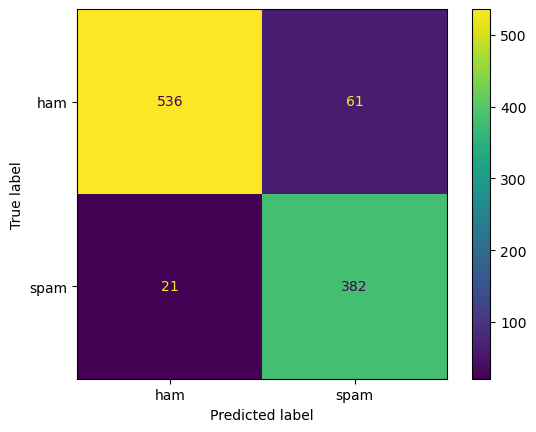

In [91]:
print("Accuracy:", accuracy_score(y_test, y_pred_vc))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_vc))

print(classification_report(y_pred_vc, y_test))

#Based on sklearn ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_vc, labels=spam_vc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=spam_vc.classes_)

disp.plot()
plt.show()

AdaBoost Ensemble with Decision Tree using 1000/4601 test size

In [92]:
#Split df into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000/4601, random_state=42) 

In [93]:
#Create AdaBoost Classifer Model
spam_abc = AdaBoostClassifier(base_estimator=spam_dt)

#Train the model
spam_abc1 = spam_abc.fit(X_train, y_train)

#Predict on testing data
y_pred_abc = spam_abc1.predict(X_test)

Accuracy: 0.912
Confusion matrix:
 [[546  51]
 [ 37 366]]
              precision    recall  f1-score   support

         ham       0.91      0.94      0.93       583
        spam       0.91      0.88      0.89       417

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000



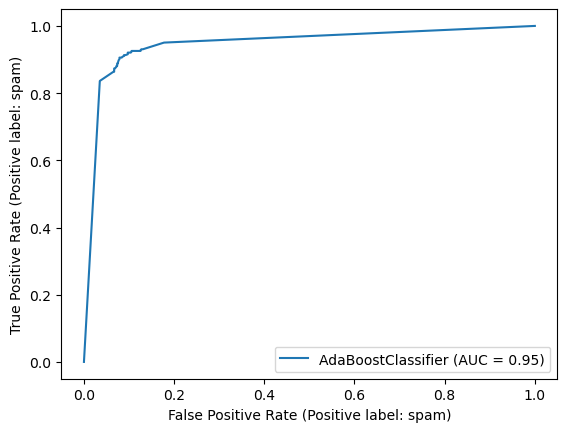

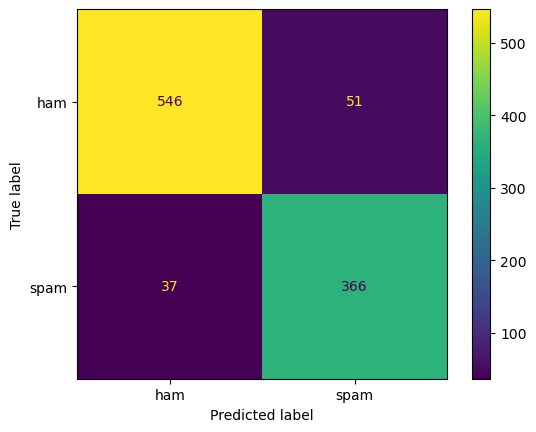

In [94]:
print("Accuracy:", accuracy_score(y_test, y_pred_abc))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_abc))

print(classification_report(y_pred_abc, y_test))

#Based on sklearn ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_abc, labels=spam_abc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=spam_abc.classes_)

#Plot ROC curve
RocCurveDisplay.from_estimator(spam_abc, X_test, y_test)

disp.plot()
plt.show()

Random Forest Classifier

In [95]:
#Split df into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000/4601, random_state=42) 

In [96]:
# Create Random Forest Classifer model
spam_rfc = RandomForestClassifier(n_estimators = 1000)

#Train the model
spam_rfc = spam_rfc.fit(X_train, y_train)

#Predict on testing data
y_pred_rfc = spam_rfc.predict(X_test)

Accuracy: 0.943
Confusion matrix:
 [[568  29]
 [ 28 375]]
              precision    recall  f1-score   support

         ham       0.95      0.95      0.95       596
        spam       0.93      0.93      0.93       404

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000



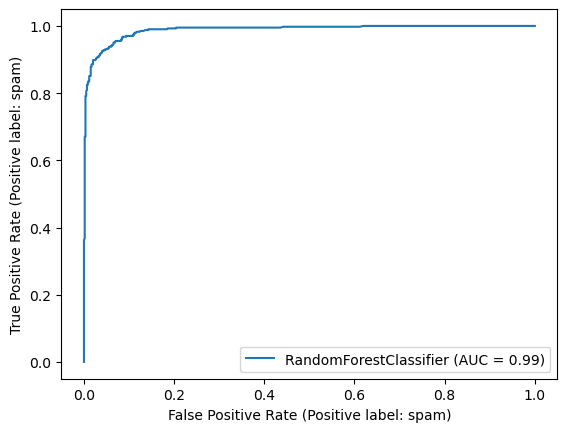

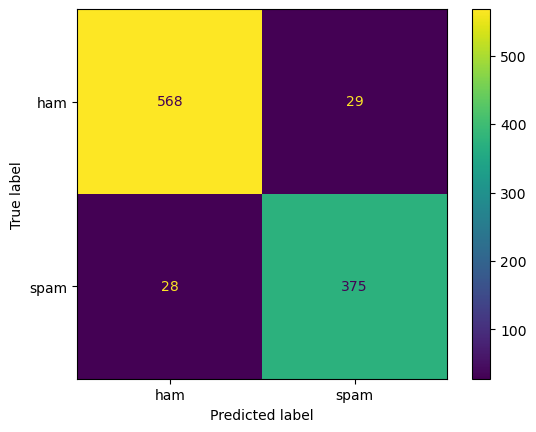

In [97]:
print("Accuracy:", accuracy_score(y_test, y_pred_rfc))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_rfc))

print(classification_report(y_pred_rfc, y_test))

#Based on sklearn ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_rfc, labels=spam_rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=spam_rfc.classes_)

#Plot ROC curve
RocCurveDisplay.from_estimator(spam_rfc, X_test, y_test)

disp.plot()
plt.show()

Function to compare test train splits, 0.5, 0.4, 0.3, 0.2 

In [105]:
def compare_split_accuracies(X, y, model):
    #Training-test splits
    splits = [0.5, 0.6, 0.7, 0.8]  

    #Store results
    results = {}  # Dictionary to store results

    for ratio in splits:
        # Split the data into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - ratio, random_state=42)

        # Fit the model on the training data
        model.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = model.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)

        # Calculate confusion matrix
        cm = confusion_matrix(y_test, y_pred)

        # Calculate classification report
        report = classification_report(y_test, y_pred)

        # Store the accuracy and confusion matrix for the current ratio
        results[f'{int(ratio*100)}% Train - {int((1-ratio)*100)}% Test'] = {
            'Accuracy': accuracy,
            'Confusion Matrix': cm,
            'Classification Report': report
        }

    return results

Compare test train splits, 0.5, 0.4, 0.3, 0.2 for Fused Classifier and the AdaBoost Ensemble with Decision Tree as the base learner

In [106]:
#Voting classifier results
vc_results = compare_split_accuracies(X, y, spam_vc)

# Print the results
for ratio, metrics in vc_results.items():
    print('Voting Classifier')
    print(f'{ratio}: \nAccuracy = {metrics["Accuracy"]}')
    print('Confusion Matrix:')
    print(metrics['Confusion Matrix'])
    print('Classification Report:')
    print(metrics['Classification Report'])
    print()

Voting Classifier
50% Train - 50% Test: 
Accuracy = 0.9182963928726641
Confusion Matrix:
[[1261  140]
 [  48  852]]
Classification Report:
              precision    recall  f1-score   support

         ham       0.96      0.90      0.93      1401
        spam       0.86      0.95      0.90       900

    accuracy                           0.92      2301
   macro avg       0.91      0.92      0.92      2301
weighted avg       0.92      0.92      0.92      2301


Voting Classifier
60% Train - 40% Test: 
Accuracy = 0.9266702878870179
Confusion Matrix:
[[1035   99]
 [  36  671]]
Classification Report:
              precision    recall  f1-score   support

         ham       0.97      0.91      0.94      1134
        spam       0.87      0.95      0.91       707

    accuracy                           0.93      1841
   macro avg       0.92      0.93      0.92      1841
weighted avg       0.93      0.93      0.93      1841


Voting Classifier
70% Train - 30% Test: 
Accuracy = 0.926864590876

In [108]:
#AdaBoost Ensemble with Decision Tree
abc_results = compare_split_accuracies(X, y, spam_abc)

#Print results
for ratio, metrics in abc_results.items():
    print('AdaBoost Classifier')
    print(f'{ratio}: \nAccuracy = {metrics["Accuracy"]}')
    print('Confusion Matrix:')
    print(metrics['Confusion Matrix'])
    print('Classification Report:')
    print(metrics['Classification Report'])
    print()

AdaBoost Classifier
50% Train - 50% Test: 
Accuracy = 0.8970013037809648
Confusion Matrix:
[[1262  139]
 [  98  802]]
Classification Report:
              precision    recall  f1-score   support

         ham       0.93      0.90      0.91      1401
        spam       0.85      0.89      0.87       900

    accuracy                           0.90      2301
   macro avg       0.89      0.90      0.89      2301
weighted avg       0.90      0.90      0.90      2301


AdaBoost Classifier
60% Train - 40% Test: 
Accuracy = 0.8967952199891364
Confusion Matrix:
[[1016  118]
 [  72  635]]
Classification Report:
              precision    recall  f1-score   support

         ham       0.93      0.90      0.91      1134
        spam       0.84      0.90      0.87       707

    accuracy                           0.90      1841
   macro avg       0.89      0.90      0.89      1841
weighted avg       0.90      0.90      0.90      1841


AdaBoost Classifier
70% Train - 30% Test: 
Accuracy = 0.902968